# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
x, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)


In [2]:
import numpy as np
y_train=y_train.reshape(-1,1)
z_train=np.concatenate((x_train,y_train),axis=1)
z_train.shape

(80, 6)

In [3]:
y_train.min()

-261.6982943912921

## Visualize Dataset
This is the same code from Assignment 1

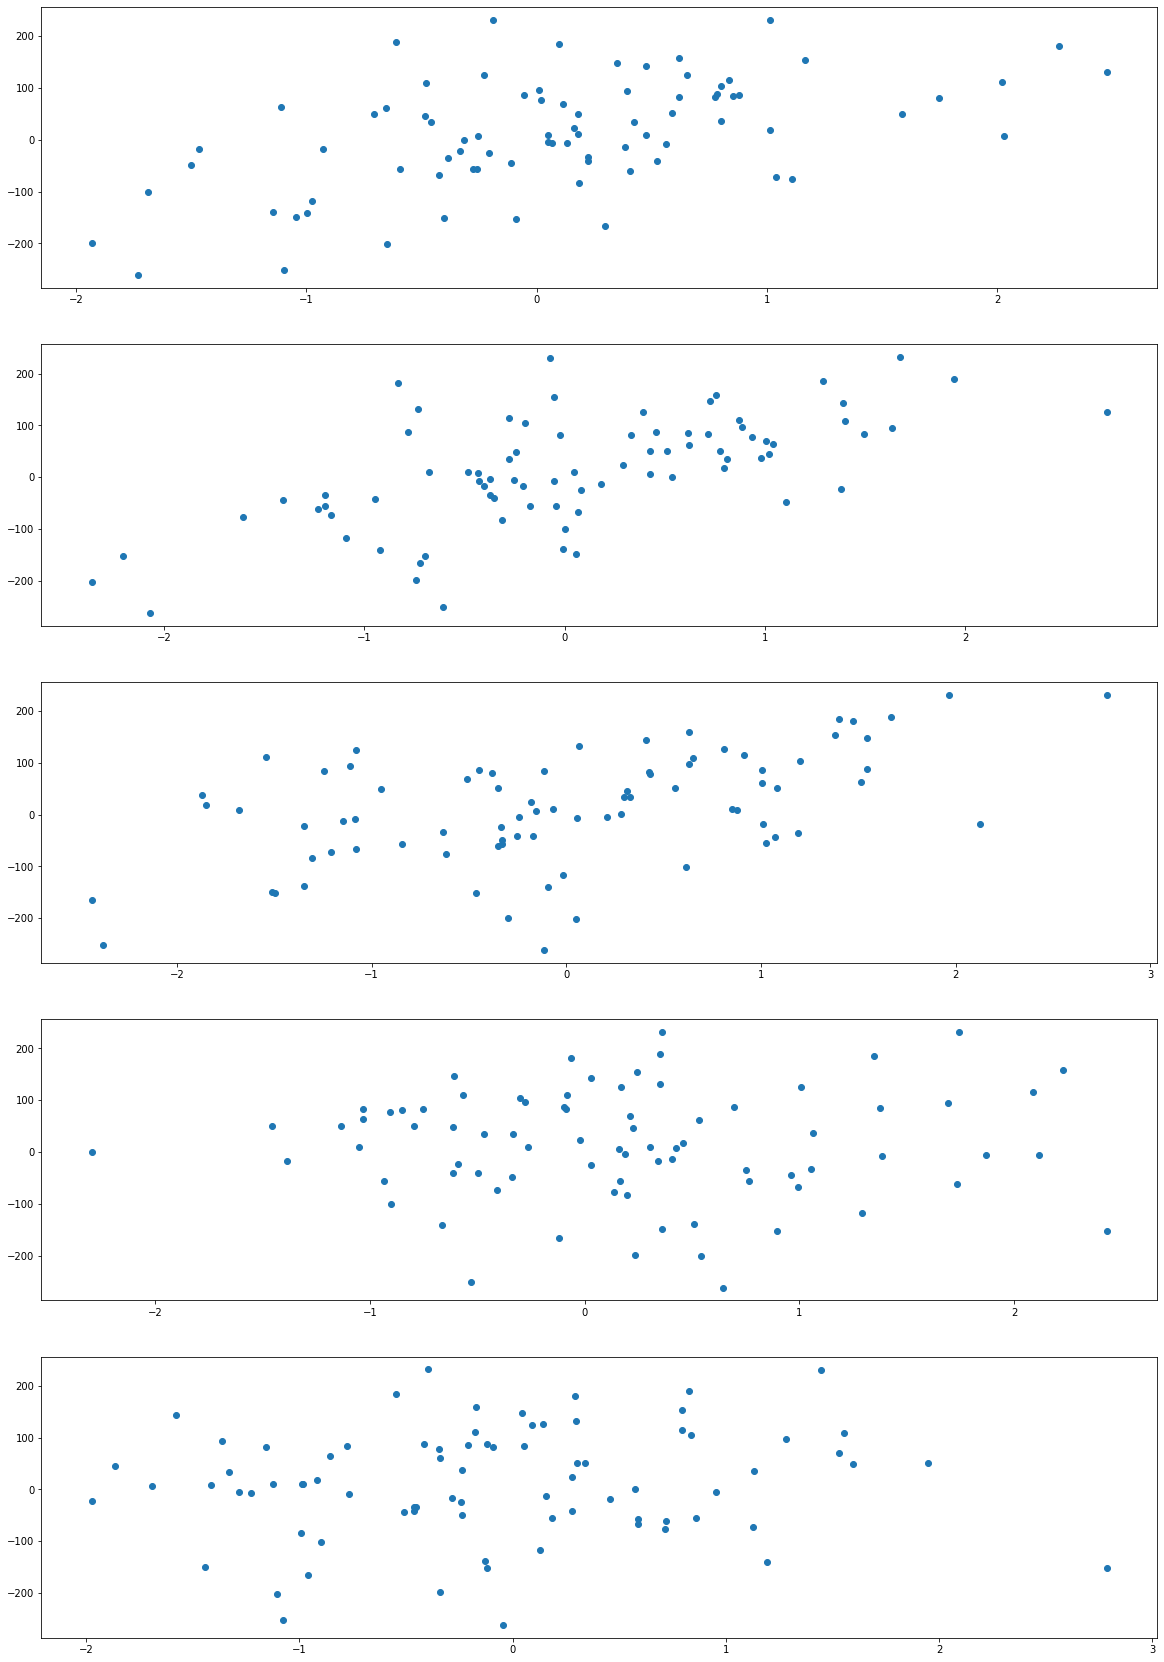

In [4]:

# Visualizing the train dataset 
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5,figsize=(20,30))

for i in range(5):
  axs[i].scatter(x_train[:,i],y_train)




# Your code here

<AxesSubplot:>

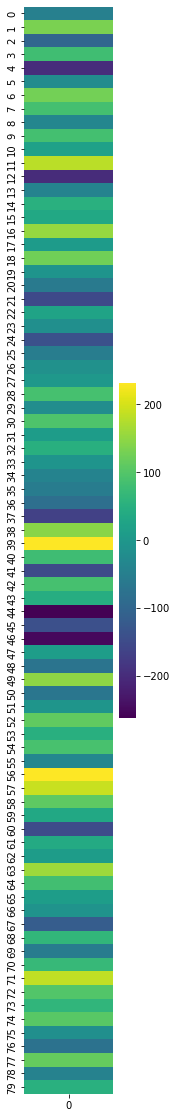

In [5]:

# Represents what is the value counts of different values in the target column in training dataset
import seaborn as sns
plt.figure(figsize=(2,20))
sns.heatmap(y_train,cmap='viridis')



## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [6]:
import tensorflow as tf
from tensorflow import keras


def build_model():
  model=tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=5)  ,
      tf.keras.layers.Dense(5,activation='relu'),
      tf.keras.layers.Dense(5,activation='relu'),
      tf.keras.layers.Dense(1)

  ])

  optimi=tf.keras.optimizers.SGD( learning_rate=0.01)


  model.compile(loss='mean_squared_error',optimizer=optimi,metrics=['mse'])
  return model

model=build_model()



# Your code here

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [8]:
results=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 306ms/step - loss: 12262.9619 - mse: 12262.9619 - val_loss: 11092.0488 - val_mse: 11092.0488
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 14371.0664 - mse: 14371.0664 - val_loss: 7165.2935 - val_mse: 7165.2935
Epoch 3/100
2/2 [==============================] - 0s 44ms/step - loss: 12583.0078 - mse: 12583.0078 - val_loss: 7146.7114 - val_mse: 7146.7114
Epoch 4/100
2/2 [==============================] - 0s 48ms/step - loss: 12578.8672 - mse: 12578.8672 - val_loss: 7129.0264 - val_mse: 7129.0264
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 12573.8975 - mse: 12573.8975 - val_loss: 7111.7861 - val_mse: 7111.7861
Epoch 6/100
2/2 [==============================] - 0s 44ms/step - loss: 12572.4795 - mse: 12572.4795 - val_loss: 7095.2236 - val_mse: 7095.2236
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 12567.2871 - mse: 12567.2871 - val_loss: 7079.9390 - val_mse:

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

In [9]:
import pandas as pd
res=pd.DataFrame(results.history)
res['epoch']=results.epoch
res.tail()

,loss,mse,val_loss,val_mse,epoch
95,12530.587891,12530.587891,6776.229492,6776.229492,95
96,12527.291016,12527.291016,6774.919922,6774.919922,96
97,12533.886719,12533.886719,6774.007812,6774.007812,97
98,12530.399414,12530.399414,6772.510742,6772.510742,98
99,12527.221680,12527.221680,6771.360352,6771.360352,99


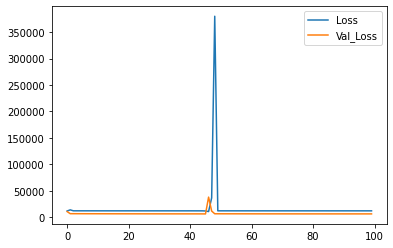

In [10]:
plt.plot(res['epoch'],res['loss'])
plt.plot(res['epoch'],res['val_loss'])
plt.legend(["Loss","Val_Loss"])
# plt.xlim(0,80)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [11]:
# Insert the function for R2 Score

def r2_score_predictor(y_true,y_pred):
  from sklearn.metrics import r2_score
  r=r2_score(y_true,y_pred)
  return r
predictions=model.predict(x_test)
r=r2_score_predictor(y_test,predictions)



In [12]:
print("The r2_score value is ",r)

The r2_score value is  -0.0909121073526411


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
x_2, y_2 = datasets.make_regression(n_samples=1000, n_features=5, noise=5, random_state=4)


# Split the data
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=1234)


Instead of using SGD optimizer we can use Adam optimizer to get better results.

In [4]:
import tensorflow as tf
model_2=tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=5)  ,
      tf.keras.layers.Dense(30,activation='relu'),
      tf.keras.layers.Dense(30,activation='relu'),
      tf.keras.layers.Dense(1)

  ])

optimi=tf.keras.optimizers.Adam( learning_rate=0.01)


model_2.compile(loss='mean_squared_error',optimizer=optimi,metrics=tf.keras.metrics.Accuracy())







In [5]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                180       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [6]:
results_2=model_2.fit(x_train_2,y_train_2,epochs=20,validation_split=0.2)

Epoch 1/20
20/20 [==============================] - 1s 17ms/step - loss: 22293.0352 - accuracy: 0.0000e+00 - val_loss: 22968.2930 - val_accuracy: 0.0000e+00
Epoch 2/20
20/20 [==============================] - 0s 5ms/step - loss: 16845.7617 - accuracy: 0.0000e+00 - val_loss: 11418.9531 - val_accuracy: 0.0000e+00
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 4155.4365 - accuracy: 0.0000e+00 - val_loss: 745.3987 - val_accuracy: 0.0000e+00
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 621.0253 - accuracy: 0.0000e+00 - val_loss: 412.5599 - val_accuracy: 0.0000e+00
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 308.1701 - accuracy: 0.0000e+00 - val_loss: 312.2416 - val_accuracy: 0.0000e+00
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 240.7342 - accuracy: 0.0000e+00 - val_loss: 267.2795 - val_accuracy: 0.0000e+00
Epoch 7/20
20/20 [==============================] - 0s 5ms/step - loss: 207.04

In [8]:
import pandas as pd
res_2=pd.DataFrame(results_2.history)
res_2['epoch']=results_2.epoch
res_2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,67.119057,0.0,84.632462,0.0,15
16,59.660431,0.0,64.358604,0.0,16
17,50.166718,0.0,57.640575,0.0,17
18,45.991909,0.0,50.390099,0.0,18
19,43.389484,0.0,46.821648,0.0,19


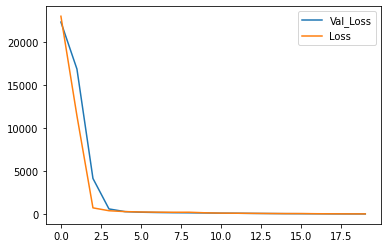

In [10]:
import matplotlib.pyplot as plt
plt.plot(res_2['epoch'],res_2['loss'])
plt.plot(res_2['epoch'],res_2['val_loss'])
plt.legend(["Val_Loss","Loss"])
# plt.xlim(0,80)

In [12]:
#  R2 score calculation

from sklearn.metrics import r2_score
predic=model_2.predict(x_test_2)
r2_sco=r2_score(y_test_2,predic)
print("r2_score is ",r2_sco)

r2_score is  0.9978912555372441


r2_score coming close to 1 signify that our model is performing very well on the test data set .